<h1>Part 1: Random Walker<h1>

In [1]:
import numpy
import random
import matplotlib.pyplot as plt

In [2]:
n = 100
x = numpy.zeros(n)
y = numpy.zeros(n)

In [3]:
for i in range(1, n):
    val = random.randint(1, 10)
    if val == 1 or val == 5 or val == 9:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2 or val == 6:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3 or val == 7 or val == 10:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1

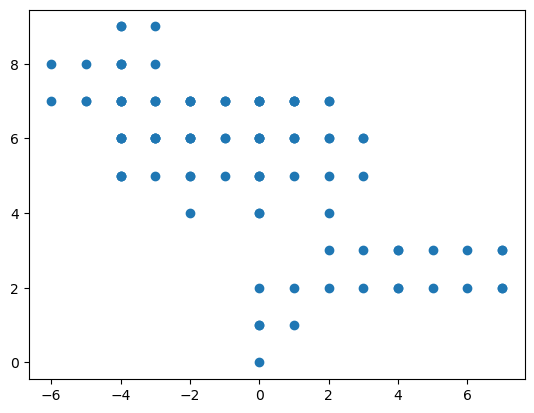

In [4]:
plt.scatter(x, y)
plt.show()

<h3>References<h3>

https://stackoverflow.com/questions/17322041/visualizing-a-2d-random-walk-in-python

https://towardsdatascience.com/random-walks-with-python-8420981bc4bc

<h3>Explanation<h3>

This model seems to confirm that the random number are normally distributed. I have gathered this using the n steps to sqrt(n) = r rule. these models deviate slightly for that, but that is not because the random number are not uniformily distributed, but that that the number of possible random numbers itself is not divisble by 4, I made it so that it was equally likely to go up or right, and then respectively down and left as well, but those sets of 2 themselves are not equally likely still, in a case with 100 steps the farthest radius was 12, and with 10000, it was roughly 140, which is not perfect according to the standard but also further affirms true randomness.

<h1>Part 2: Cellular Automata<h1>

In [5]:
import numpy
import matplotlib.pyplot as plt

In [6]:
out = [0, 0, 0, 1, 1, 1, 1, 0]
print(out)

[0, 0, 0, 1, 1, 1, 1, 0]


In [7]:
inp = numpy.zeros([8,3])
 
inp[0] = [1., 1., 1.]
inp[1] = [1., 1., 0.]
inp[2] = [1., 0., 1.]
inp[3] = [1., 0., 0.]
inp[4] = [0., 1., 1.]
inp[5] = [0., 1., 0.]
inp[6] = [0., 0., 1.]
inp[7] = [0., 0., 0.]


In [8]:
c = 50
r = int(c/2)+1

In [9]:
grid = numpy.zeros([r, c+2])
grid[0, int(c/2)+1] = 1

In [10]:
for i in numpy.arange(0, r-1):
    for j in numpy.arange(0,c):
        for k in range(8):
            if numpy.array_equal(inp[k, :], grid[i, j:j+3]):
                grid[i+1 , j+1] = out[k]

Text(0.5, 1.0, 'Cellular Automata')

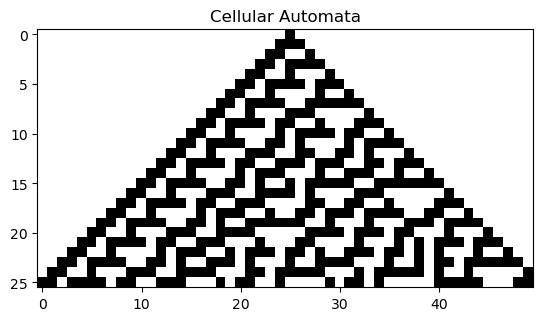

In [11]:
plt.imshow(grid[:, 1:c+1], cmap = "Greys")
plt.title("Cellular Automata")

<h3>References<h3>

https://matplotlib.org/matplotblog/posts/elementary-cellular-automata/

https://www.youtube.com/watch?v=YQyQyxtLvi8

<h3>Explanation<h3>

After doing some research, i chose a value of 30, as it is somewhat repetitive but not an exactly symmetric boring pattern. I did not necessarily need to choose a stopping condition using this method, rather specify how many rows and columns I would like to be shown on the graph. The only factor that i used in choosing this is that I new for everyone 1 new row I would add to the canvas, I would inherently have to add 2 columns, limiting how far I wanted to image to zoom out, so that the patterns could still be observed.

<h1>Part 3: Game of Life<h1>

COLOR_BG = (10, 10, 10)
COLOR_GRID = (40, 40, 40)
COLOR_DIE_NEXT = (170, 170, 170)
COLOR_ALIVE_NEXT = (255, 255, 255)

def update(screen, cells, size, with_progress=False):
    updated_cells = np.zeros((cells.shape[0], cells.shape[1]))
    
    for row, col in np.ndindex(cells.shape):
        alive = np.sum(cells[row-1:row+2, col-1:col+2]) - cells[row, col]
        color = COLOR_BG if cells[row, col] == 0 else COLOR_ALIVE_NEXT
        
        if cells[row, col] == 1:
            if alive < 2 or alive > 3:
                if with_progress:
                    color = COLOR_DIE_NEXT
                elif 2 <= alive <= 3:
                    updated_cells[row, col] = 1
                    if with_progress:
                        color = COLOR_ALIVE_NEXT
        else:
            if alive == 3:
                updated_cells[row, col] = 1
                if with_progress:
                    color = COLOR_ALIVE_NEXT
                    
        pygame.draw.rect(screen, color, (col*size, row*size, size-1, size-1))
        
    return updated_cells
            

<h3>Reference Help<h3>

My first attempt at recreating this game did not work, however the above code segment did help clarify the basis of the rules for the game, and I used it as a reference point for my following iterations

https://www.youtube.com/watch?v=cRWg2SWuXtM

https://matgomes.com/conways-game-of-life-python/

In [22]:
from collections import namedtuple

Dim = namedtuple("Dimension", ["width", "height"])
Grid = namedtuple("Grid", ["dim", "cells"])
Adjacents = namedtuple("Adjacents", ["alive", "dead"])

The link above was a very nice article explaining the development of the game of life in python and how to utilize namedtuple in order to simplify the complexity of the overall code.

In [23]:
block_and_glider = Grid(Dim(50, 50), {(1,1),(2,2),(2,3),(3,2),(3,1), (4,4), (4,5), (5,4), (5,5)})

In [24]:
import sys
import time
from collections import defaultdict
from copy import deepcopy

import pygame
import numpy as np

In [25]:
def get_adj(grid: Grid, x: int, y: int):
    offsets = [(-1, -1), (0, -1), (1, -1), (-1, 0), (1, 0), (-1, 1), (0, 1), (1, 1)]
    possible_neighbours = {(x + x_off, y + y_off) for x_off, y_off in offsets}
    alive = {(pos[0], pos[1]) for pos in possible_neighbours if pos in grid.cells}
    
    return Adjacents(alive, possible_neighbours - alive)


def update_grid(grid: Grid) -> Grid:
    undead = defaultdict(int)
    next_cells = deepcopy(grid.cells)
    
    for (x, y) in grid.cells:
        live_cells, dead_cells = get_adj(grid, x, y)
        if len(live_cells) not in [2, 3]:#need 2 to 3 living cell neighbors for relevance
            next_cells.remove((x, y))

        for i in dead_cells:
            undead[i] += 1

    for pos, _ in filter(lambda elem: elem[1] == 3, undead.items()):#if 3 neighbors
        next_cells.add((pos[0], pos[1]))

    return Grid(grid.dim, next_cells)


def init_grid(screen: pygame.Surface, grid: Grid) -> None:
    cell_width = screen.get_width() / grid.dim.width
    cell_height = screen.get_height() / grid.dim.height

    for (x, y) in grid.cells:
        pygame.draw.rect(screen, (255, 0, 0), (x * cell_width + 2, y * cell_height + 2, cell_width - 2, cell_height - 2))

In [5]:
def main():
    grid = block_and_glider

    pygame.init()
    screen = pygame.display.set_mode((600, 400))

    while True:
        if pygame.QUIT in [e.type for e in pygame.event.get()]:
            sys.exit(0)
            
        screen.fill((0, 0, 0))
        init_grid(screen, grid)
        grid = update_grid(grid)
        pygame.display.flip()
        time.sleep(0.1)

In [ ]:
if __name__ == "__main__":
    main()

<h4>More References<h4>

https://stackoverflow.com/questions/51425023/exiting-pygame-by-pressing-space#:~:text=Run%20this%20in%20a%20loop%3A%20keys%20%3D%20pygame.key.get_pressed,key%20Space%20is%20pressed%2C%20this%20will%20quit%20Pygame.

https://www.geeksforgeeks.org/conways-game-life-python-implementation/

https://www.pygame.org/project/5560/

https://stackoverflow.com/questions/33163325/game-of-life-pygame

https://betterprogramming.pub/how-to-write-conwells-game-of-life-in-python-c6eca19c4676

https://www.youtube.com/watch?v=cRWg2SWuXtM

https://www.youtube.com/watch?v=fei4bJQdBUQ

https://www.youtube.com/watch?v=d73z8U0iUYE&t=489s

https://github.com/domoritz/gameoflife-python

<h3>Validation Testing<h3>

As far as I can tell, this iteration of my design is working. The first 3 however, were not as lucky. in the first iteration I believe my cells were attempting to update too quickly, and therefore some specific structures were working, which made me believe it was fully working, until I could not get any additional blocks to be produced. Static structures worked correctly, but moving structures could not move besides oscilating in place relative to their center.

The second iteration would not actually run the simulation, it was giving me a multitude of errors with the exit and timing scheme I was attempting to use, and after doing further work I believe this iteration may have worked, however I deleted it well before finding the solution. For some reason it seems Jupyter Notebook is somewhat buggy with the pygame.events functions, and will not respond to the correct combination of buttons to exit. If it then believes there is no actual exit scheme, the program will buffer until it has exceeded the time limit.

The third iteration of my design was more promising, as it did allow the correct structures to be formed, and those same structures moved, but for some reason they could only move a distance of one before being destroyed by the game. I am still not sure why this was occuring, but i believe I was updating the grid too frequently.

The final iteration is what is here, which I received a lot of help from the previously mentioned sources on. I validated it by building each of the structures in the grid variable, and just checking 2 or 3 of each type of structure. I did not want to test the large ship as it is a lot of coordinates, all objects seem to move as expected. I have been having some trouble centering the image and I am not sure why, but if you wait long enough on block_and_glider, a glider will move down the screen.

<h1>Part 4: Asychronous Updating<h1>

In [26]:
block_and_glider_osc = Grid(Dim(50, 50), {(1,1),(2,2),(2,3),(3,2),(3,1), (4,4), (4,5), (5,4), (5,5), (8,4), (8,5), (8,6)})

In [27]:
def random_update_grid(grid: Grid) -> Grid:
    next_cells = deepcopy(grid.cells)
    undead = defaultdict(int)

    #analyze the number of valid cells and pick a random number in that range
    j = np.random.randint(len(grid.cells))
    count = 0
    
    #this loop will run n == len(grid.cells) many times, so j should always appear
    for (x, y) in grid.cells:
        #once j == that iteration of the loop that cell will update
        if(j==count):
            live_cells, dead_cells = get_adj(grid, x, y)
            if len(live_cells) not in [2, 3]:#need 2 to 3 living cell neighbors for relevance
                next_cells.remove((x, y))

            for i in dead_cells:
                undead[i] += 1

    for pos, _ in filter(lambda elem: elem[1] == 3, undead.items()):#if 3 neighbors
        next_cells.add((pos[0], pos[1]))

    return Grid(grid.dim, next_cells)

In [28]:
def main():
    grid = block_and_glider_osc

    pygame.init()
    screen = pygame.display.set_mode((600, 400))

    while True:
        if pygame.QUIT in [e.type for e in pygame.event.get()]:
            sys.exit(0)

        screen.fill((0, 0, 0))
        init_grid(screen, grid)
        grid = random_update_grid(grid)
        pygame.display.flip()
        time.sleep(0.1)

In [29]:
if __name__ == "__main__":
    main()

SystemExit: 0

C:\Users\Ryan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<h3>Effects on Sychronous Model<h3>

The code still works but in a very odd way. Oscillators and still life in particular seem fine will no interaction, however the code seems to get confused once any of the objects interact with a moving spaceship. The updates occur much slower once any collision has occured, and im not sure if the lag is due to the random amount of time it could take to update or because of issues with pygame updating, but I have reached 2 conclusions: the run time will be exponentially longer on this program at least in respect to how I have managed to model this, and secondly it is much more difficult to analyze the interactions between any 2 life forms because you have no idea which one is going to update, nor can you really tell which direction/state it was in before the last movement, making it extremely difficult to validate if the correct interactions are occuring between every time step

<h3>References<h3>

https://www.scaler.com/topics/numpy/numpy-random/

https://en.wikipedia.org/wiki/Asynchronous_cellular_automaton